<a href="https://colab.research.google.com/github/albertomarin12/Simulac-n-matem-tica/blob/main/Tarea_Caminata_aleatoria_y_simulaci%C3%B3n_montecarlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea - Caminata aleatoria y simulación montecarlo

#### 1. Simulación del movimiento browniano

El movimiento browniano es el movimiento aleatorio que se observa en las partículas que se hallan en un medio fluido, como resultado de choques contra las moléculas de dicho fluido [(referencia)].

[(referencia)]: https://es.wikipedia.org/wiki/Movimiento_browniano

Para simular el movimiento, en lugar de usar las ecuaciones integro-diferenciales que describe Einstein, use una caminta aleatoria para los tres ejes $x$, $y$, $z$ de la siguiente forma
$$
W_i=W_{i-1}+X_i\sqrt{\Delta t}
$$
donde, $\Delta t$ es un intervalo de tiempo y 
$$
X_i=\left\{\begin{array}{l}
1\\
-1
\end{array}\right.,
$$
se escoge de forma aleatoria con la misma probabilidad.

Simule $10$ segundos con un $\Delta t=0.001$ y represéntelo en un gráfico 3D (Puede ver el archivo de Ejemplo 3D).

In [30]:
import numpy as np 
import random 
import matplotlib.pyplot as plt

lista_de_opciones = [1,-1]
x = []
y = []
z = []
i1 = 0
i2 = 0
i3= 0
raiz = np.sqrt(0.001)
contador = 0
while contador < 10/0.001:
    r1 = random.choice(lista_de_opciones)
    r2 = random.choice(lista_de_opciones)
    r3 = random.choice(lista_de_opciones)        
    i1 = i1 + r1*raiz
    i2 = i2 + r2*raiz
    i3 = i3 + r3*raiz
    sumar1 = x.append(i1)
    sumar2 = y.append(i2)
    sumar3 = z.append(i3)
    contador = contador + 1


### Gráfica en 3D simulando 10 segundos de movimientos aleatorios en X Y Z.

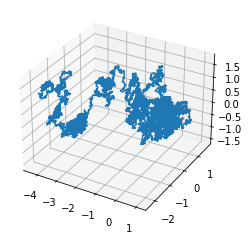

In [31]:
    
# Modulos con los que trabajaremos
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np

# Creamos la figura
fig = plt.figure()

# Agrrgamos un plano 3D
ax1 = fig.add_subplot(111,projection='3d')

# Datos en array bi-dimensional
x = np.array([x])
y = np.array([y])
z = np.array([z])
# plot_wireframe nos permite agregar los datos x, y, z. Por ello 3D
# Es necesario que los datos esten contenidos en un array bi-dimensional
ax1.plot_wireframe(x, y, z)

# Mostramos el gráfico
plt.show()

#### 2. Apuesta arriesgada

Un jugador, con 20 pesos de capital inicial, decide apostar a un volado (con una moneda perfectamente nivelada) la mitad de su capital si éste es mayor o igual a 6 pesos, de lo contrario, solo 2. Esto es, el capital $C_i$ en cada volado $V_i$ se describe como
$$
C_{i+1}=C_i+V_iA_i
$$
donde la apuesta es 
$$
A_i=\left\{\begin{array}{l}
C_i/2,\quad \mbox{si }C_i\geq 6\\
2,\quad \mbox{de lo contrario.}
\end{array}\right.
$$

1. Grafique la evolución del capital hasta quedar en cero.
2. Determine el número de volados promedio para quedar en quiebra usando la simulación montecarlo para 10,000 apostadores.
3. Muestre un histograma del número de volados.

In [3]:
CO=20
C=([0])
C[0] = CO


In [4]:
C[-1]

20

In [17]:
import numpy as np 
import random 
import matplotlib.pyplot as plt

def juego(C0):
  lista_de_opciones = [1,-1]
  C = ([0])
  C[0] = CO
  contador = 0
  while C[-1] > 0:
    if C[-1] >= 6:
      apuesta = C[-1]/2
    else:
      apuesta = 2  
    r1 = random.choice(lista_de_opciones)
    if r1 == -1:
      C.append(C[-1] - apuesta)
    else:
      C.append(C[-1] + apuesta)
    plt.plot(C)  
    if C[-1] > 0:
      contador += 1  
  return contador,C


### Gráfica de una sola simulación empezando con 20 pesos hasta perderlo todo.

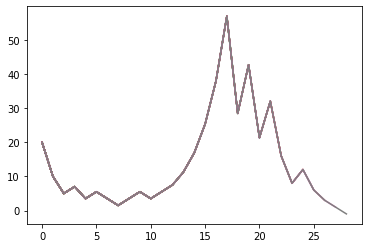

In [22]:
a = juego(20)


### Gráfica de 10,000 simulaciones empezando con 20 pesos hasta perderlo todo.

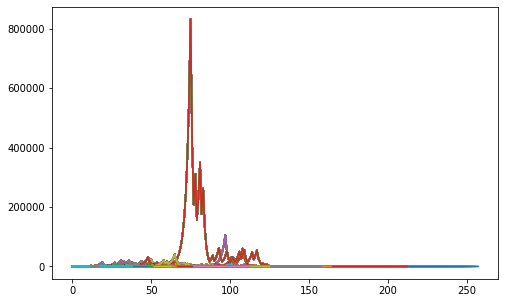

In [24]:
%matplotlib inline
plt.figure(figsize=(8,5))
suma=0
volados=([])
n=10000
for i in range(n):
    a=juego(20)
    volados.append(a[0])
    suma+=a[0]
    plt.plot(a[1])

prom=suma/n

In [25]:
print("El promedio de volados que los jugadores tienen que jugar para llegar la quiebra es de: " + str(prom))

El promedio de volados que los jugadores tienen que jugar para llegar la quiebra es de: 25.193


### Gráfica sobre la cantidad de volados que jugaron cada uno de los 10,000 jugadores para quedarse en quiebra.

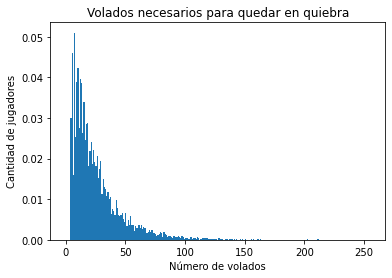

In [32]:
plt.hist(volados, bins=range(int(np.max(volados))), density=True)
plt.xlabel('Número de volados')
plt.ylabel('Cantidad de jugadores')
plt.title('Volados necesarios para quedar en quiebra')
plt.show()
